In [42]:
path =  r'C:\Users\paco2\Documents\GitHub\MachineLearningProyect\Testtt\labels_test\labels'
img_path = r'C:\Users\paco2\Documents\GitHub\MachineLearningProyect\CrossWalk\New_Data\crosswalk dataset-20240624T170657Z-001\crosswalk dataset'
save_path = r'C:\Users\paco2\Documents\GitHub\MachineLearningProyect\predict'


In [43]:
import os
import io

def find_files_with_one(directory):
    files_with_one = []
    original_dict={}
    files_type:dict[str,bool]={}

    for filename in os.listdir(directory):
        if filename.endswith(".txt"):
            original_dict[filename]=False
            file_path = os.path.join(directory, filename)
            with io.open(file_path, 'r', encoding='utf8') as f:
                if '1' in f.read():
                    files_with_one.append(filename)
                    files_type[filename]=True
                else:
                    files_type[filename]=False

    return files_with_one,files_type,original_dict

# Uso de la función
directory_path =r'C:\Users\paco2\Documents\GitHub\MachineLearningProyect\CrossWalk\New_Data\crosswalk dataset-20240624T170657Z-001\Annotations'
result,file_type,original_dir = find_files_with_one(directory_path)
print(len(result))

2491


In [44]:
len(original_dir)

3342

In [45]:
def load_files_with_yolo_label(directory_path,original_dict:dict[str,bool]):
    temp=[]
    for filename in os.listdir(directory_path):
        temp.append(filename)
        if filename not in original_dict:
            raise Exception(f'El archivo {filename} no esta')
        original_dict[filename]=True
    return temp
file_list=load_files_with_yolo_label(path,original_dir)


In [46]:
len(file_list)

2444

In [47]:
len(original_dir)

3342

In [48]:
import pandas as pd

# Diccionario con nombres de archivos y valores True/False
file_dict =file_type

# Segunda lista con nombres de archivos


# Crear DataFrame a partir del diccionario
df = pd.DataFrame(list(file_dict.items()), columns=['Filename', 'Value'])

# Crear columnas para falsos positivos y falsos negativos
df['False Positives'] = ~df['Filename'].isin(file_list) & df['Value']
df['False Negatives'] = df['Filename'].isin(file_list) & ~df['Value']

print(df)

             Filename  Value  False Positives  False Negatives
0     test_000001.txt  False            False            False
1     test_000002.txt  False            False            False
2     test_000003.txt  False            False            False
3     test_000004.txt  False            False            False
4     test_000005.txt  False            False             True
...               ...    ...              ...              ...
3337  test_003332.txt   True            False            False
3338  test_003333.txt   True            False            False
3339  test_003334.txt   True            False            False
3340  test_003335.txt   True            False            False
3341  test_003336.txt   True            False            False

[3342 rows x 4 columns]


In [49]:
from sklearn import metrics
import numpy as np

# Supongamos que original_dict es tu diccionario de verdad y file_dict es tu diccionario de predicciones
y_true = np.array(list(original_dir.values())).astype(int)
y_pred = np.array(list(file_dict.values())).astype(int)

# Calcular y mostrar las métricas
accuracy = metrics.accuracy_score(y_true, y_pred)
precision = metrics.precision_score(y_true, y_pred)
recall = metrics.recall_score(y_true, y_pred)
f1_score = metrics.f1_score(y_true, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")

Accuracy: 0.9631956912028725
Precision: 0.9658771577679647
Recall: 0.9844517184942717
F1 Score: 0.9750759878419453


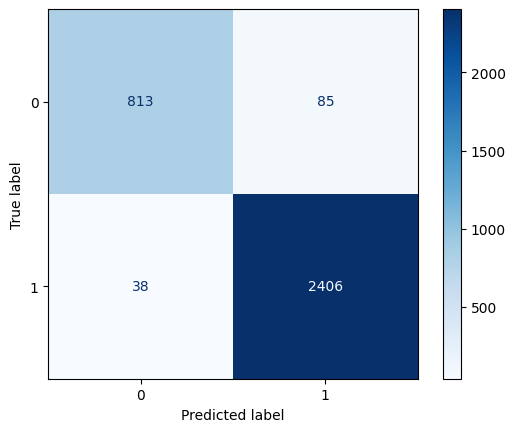

In [50]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Calcular la matriz de confusión
cm = confusion_matrix(y_true, y_pred)

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.show()

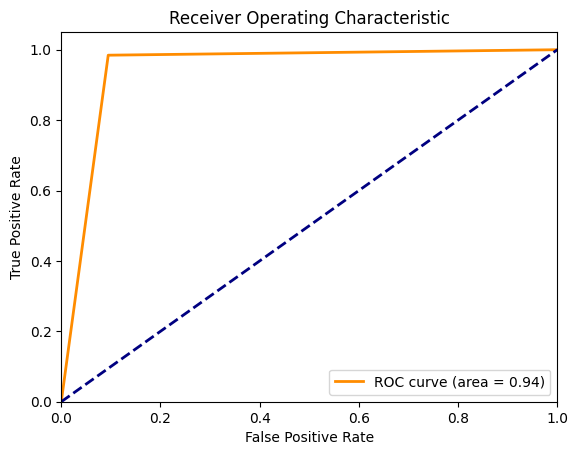

In [51]:
from sklearn.metrics import roc_curve, auc

# Calcular la curva ROC y el AUC
fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

# Visualizar la curva ROC
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [37]:
import glob
import os
import shutil
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

#Bounding Box Merge Algorithm
def merge_bounding_boxes(bounding_boxes,image_width,image_height):
  [x,y] = [image_height,image_width]
  [w,h] = [0,0]
  for i in range(0,bounding_boxes.shape[0]):
    if(bounding_boxes.ndim == 1):
      center_x_1 = int(bounding_boxes[0]*image_width)
      center_y_1 = int(bounding_boxes[1]*image_height)
      width_1 = int(bounding_boxes[2]*image_width)
      height_1 = int(bounding_boxes[3]*image_height)
      x = int(center_x_1 - (width_1/2))
      y = int(center_y_1 - (height_1/2))
      w = int(center_x_1 + (width_1/2))
      h = int(center_y_1 + (height_1/2))
    else:
      center_x_1 = int(bounding_boxes[i,0]*image_width)
      center_y_1 = int(bounding_boxes[i,1]*image_height)
      width_1 = int(bounding_boxes[i,2]*image_width)
      height_1 = int(bounding_boxes[i,3]*image_height)
      vert_x = int(center_x_1 - (width_1/2))
      vert_y = int(center_y_1 - (height_1/2))
      vert_w = int(center_x_1 + (width_1/2))
      vert_h = int(center_y_1 + (height_1/2))
      if(vert_x < x):
        x = vert_x
      if(vert_y < y):
        y = vert_y
      if(vert_w > w):
        w = vert_w
      if(vert_h > h):
        h = vert_h
    return np.array([x,y,w,h])

In [38]:
import os

for fname in os.listdir(save_path):
  if fname.endswith('.jpg'):
    ("The path already contains images, skipping this part.")
    break
else:
  from distutils.dir_util import copy_tree
  copy_tree(img_path, save_path)
  print("Path Copied!")

Path Copied!


In [52]:
path

'C:\\Users\\paco2\\Documents\\GitHub\\MachineLearningProyect\\Testtt\\labels_test\\labels'

In [53]:
for filename in glob.glob(os.path.join(path, '*.txt')):
  ww=os.path.join(os.getcwd(),filename)
  with open(ww, 'r') as f:
    bounding_boxes = None
    confidences = None
    image_name = os.path.basename(filename).replace('txt', 'jpg')
    for line in f:
      cl, label_x, label_y, label_w, label_h, conf = line.split(' ')
      b = float(conf)
      a = np.array([float(label_x),float(label_y),float(label_w),float(label_h)])
      bounding_boxes = (np.vstack((bounding_boxes, a)) if (bounding_boxes is not None) else a)
      confidences = (np.vstack((confidences, b)) if (confidences is not None) else b)
    #Image Elaboration
    path=f'{img_path}\\{image_name}'
    image = cv.imread(path)
    [image_height, image_width, levels] = image.shape
    conf_max = np.amax(confidences)
    [x,y,w,h] = merge_bounding_boxes(bounding_boxes, image_width, image_height)
    #Create Rect
    cv.rectangle(image, (x,y), (w,h), (0,0,255), 4)
    cv.putText(image, 'crosswalk ' + "%.2f" % conf_max, (x, y-10), cv.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
    #Saving Image
    print('Saving ' + image_name)
    cv.imwrite(save_path+image_name, image)

Saving test_000005.jpg
Saving test_000008.jpg
Saving test_000019.jpg
Saving test_000056.jpg
Saving test_000062.jpg
Saving test_000075.jpg
Saving test_000087.jpg
Saving test_000107.jpg
Saving test_000114.jpg
Saving test_000142.jpg
Saving test_000156.jpg
Saving test_000170.jpg
Saving test_000187.jpg
Saving test_000224.jpg
Saving test_000236.jpg
Saving test_000244.jpg
Saving test_000249.jpg
Saving test_000250.jpg
Saving test_000255.jpg
Saving test_000259.jpg
Saving test_000353.jpg
Saving test_000363.jpg
Saving test_000419.jpg
Saving test_000464.jpg
Saving test_000498.jpg
Saving test_000539.jpg
Saving test_000548.jpg
Saving test_000559.jpg
Saving test_000599.jpg
Saving test_000639.jpg
Saving test_000662.jpg
Saving test_000751.jpg
Saving test_000780.jpg
Saving test_000786.jpg
Saving test_000791.jpg
Saving test_000838.jpg
Saving test_000842.jpg
Saving test_000851.jpg
Saving test_000852.jpg
Saving test_000853.jpg
Saving test_000854.jpg
Saving test_000855.jpg
Saving test_000856.jpg
Saving test

KeyboardInterrupt: 

In [76]:
import os

def draw_bounding_box_from_yolo_label(image_path, label_path, save_path, show_image=True):
    # Leer el archivo de etiquetas
    with open(label_path, 'r') as file:
        lines = file.readlines()

    # Leer la imagen
    image = cv2.imread(image_path)

    # Obtener las dimensiones de la imagen
    image_height, image_width = image.shape[:2]
    if len(lines)<2:
        return
    for line in lines:
        # Las etiquetas YOLO están en el formato: <object-class> <x_center> <y_center> <width> <height> <confidence>
        class_id, x_center, y_center, width, height,confidence = map(float, line.split())

        # Convertir las coordenadas del centro, el ancho y la altura del bounding box de valores relativos a valores absolutos
        x_center_abs = x_center * image_width
        y_center_abs = y_center * image_height
        width_abs = width * image_width
        height_abs = height * image_height

        # Calcular las coordenadas de la esquina superior izquierda del bounding box
        x_top_left = int(x_center_abs - (width_abs / 2))
        y_top_left = int(y_center_abs - (height_abs / 2))

        # Calcular las coordenadas de la esquina inferior derecha del bounding box
        x_bottom_right = int(x_center_abs + (width_abs / 2))
        y_bottom_right = int(y_center_abs + (height_abs / 2))
        
        # Dibujar el bounding box en la imagen
        cv2.rectangle(image, (x_top_left, y_top_left), (x_bottom_right, y_bottom_right), (0, 255, 0), 2)

    # Mostrar la imagen con los bounding boxes si show_image es True
    if show_image:
        plt.imshow(image)
        plt.show()

    # Guardar la imagen en la carpeta especificada
    save_file_path = os.path.join(save_path, os.path.basename(image_path))
    cv2.imwrite(save_file_path, image)
       


In [77]:
import os
import shutil

# Definir las rutas de las carpetas de origen y destino
source_folder_labels =  r'C:\Users\paco2\Documents\GitHub\MachineLearningProyect\Testtt\labels_test\labels'
source_folder_images =r'C:\Users\paco2\Documents\GitHub\MachineLearningProyect\CrossWalk\New_Data\crosswalk dataset-20240624T170657Z-001\crosswalk dataset'
destination_folder = r'C:\Users\paco2\Documents\GitHub\MachineLearningProyect\Testtt\predict_sin_mejorar'

# Crear la carpeta de destino si no existe
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)
dict_to_draw:dict[str,str]={}
dict_imag_to_draw={}
# Copiar todos los archivos de la carpeta de labels a la carpeta de destino
for file_name in os.listdir(source_folder_labels):
    if file_name.endswith('.txt'):  # Asegurarse de que son archivos de labels
        source = os.path.join(source_folder_labels, file_name)
        dict_to_draw[file_name[:-4]]=source
       # destination = os.path.join(destination_folder, file_name)
       # shutil.copyfile(source, destination)

# Copiar todos los archivos de la carpeta de imágenes a la carpeta de destino
for file_name in os.listdir(source_folder_images):
    if file_name.endswith('.jpg'):  # Asegurarse de que son archivos de imágenes
        source = os.path.join(source_folder_images, file_name)
        name=file_name[:-4]
        if not name in dict_to_draw:
            continue
        dict_imag_to_draw[name]=source
        #destination = os.path.join(destination_folder, file_name)
        #shutil.copyfile(source, destination)

FileNotFoundError: [WinError 3] El sistema no puede encontrar la ruta especificada: 'C:\\Users\\paco2\\Documents\\GitHub\\MachineLearningProyect\\Testtt\\labels_test\\labels'

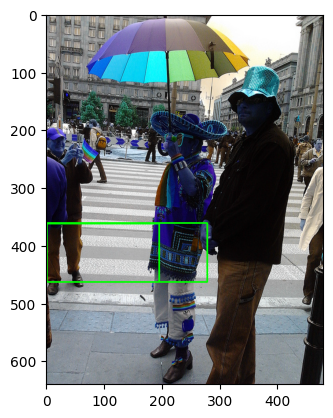

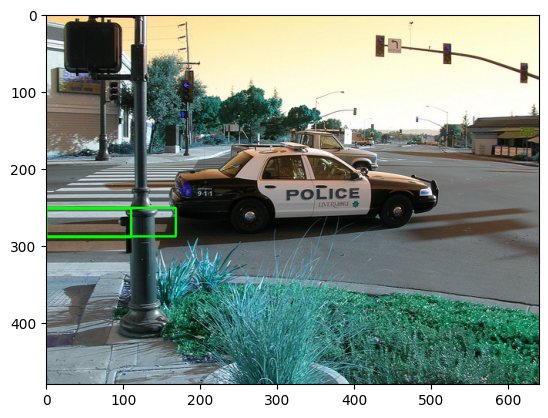

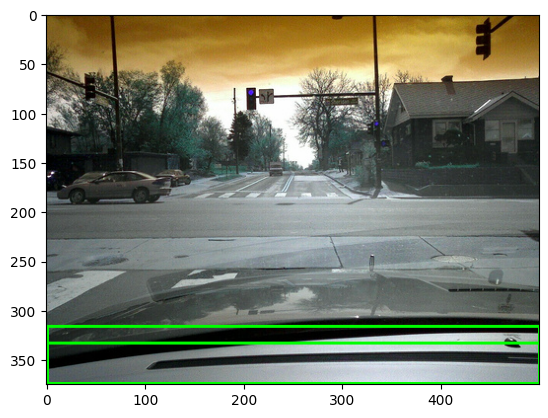

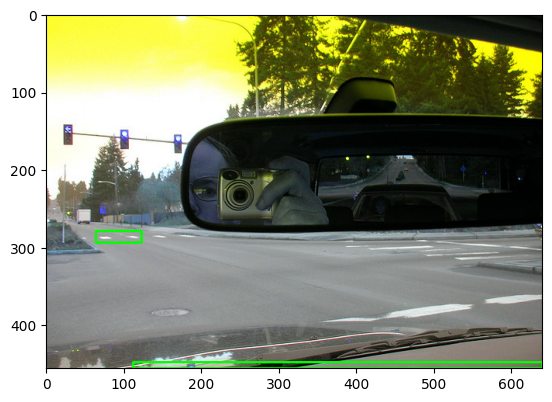

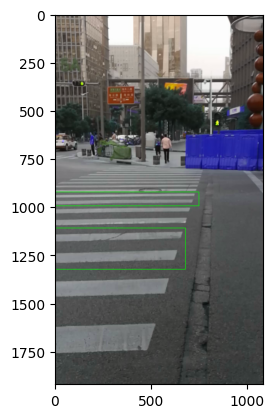

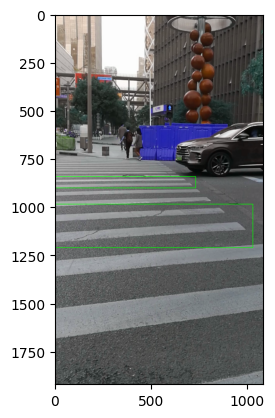

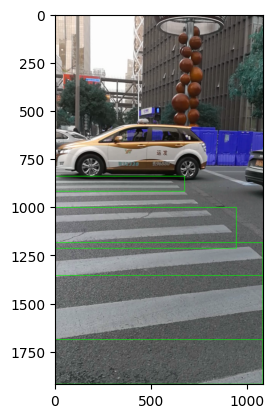

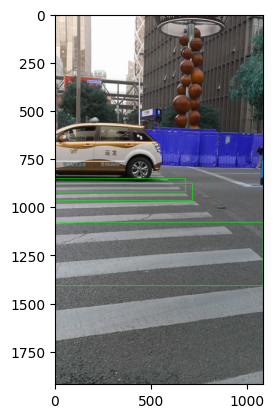

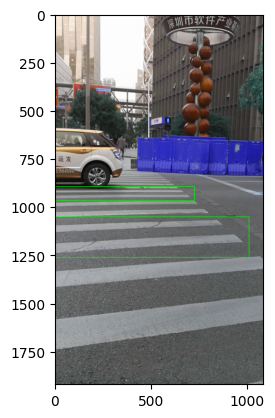

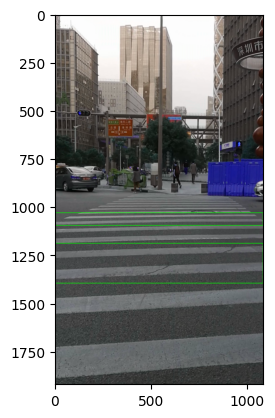

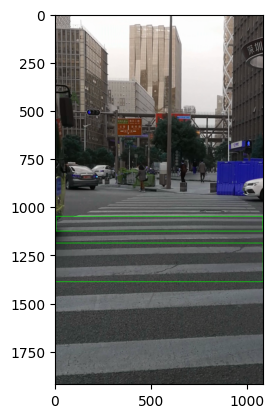

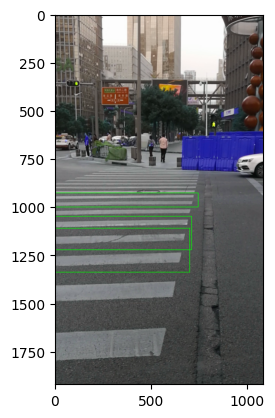

KeyboardInterrupt: 

In [69]:
for name in dict_to_draw.keys():
    label_path=dict_to_draw[name]
    image_path=dict_imag_to_draw[name]
    draw_bounding_box_from_yolo_label(image_path, label_path,r'C:\Users\paco2\Documents\GitHub\MachineLearningProyect\Testtt\predict_sin_mejorar',False)
    